# MNIST Example for MLP with momentum and batchnorm

The purpose of this demo is to help you learn about neural networks and explore how changing the architecture of a neural network impacts the performance of the network.  

You are free to change model acrhitecture, add depth or select any other hidden layers sizes.

If you have any suggestions or find errors, please, don't be hesitate to text me up @ jayanta.jayantamukherjee@gmail.com


In [1]:
import mlp
import activation as ac
import loss
from random import randint
import mnist
import numpy as np
import time
from matplotlib import pyplot as plt
import os
import glob

#### Initializing parameters

#### Download MNIST data
If MNIST dataset doesn't exist in "data" folder, it will be downloaded from 
http://deeplearning.net/data/mnist/mnist.pkl.gz

In [2]:
np.random.seed(11785)

#initialize neural parameters
learning_rate = 0.004
momentum = 0.996 
num_bn_layers= 1
mini_batch_size = 10
epochs = 5

# random weight init
def weight_init(x, y):
    return np.random.randn(x, y)

# zero bias init
def bias_init(x):
    return np.zeros((1, x))

# initialize training, validation and testing data
train, val, test = mnist.load_mnist()

#### Creating multi-layer perceptron class

In [3]:
net = mlp.MLP(784, 10, [64, 32], [ac.Sigmoid(), ac.Sigmoid(), ac.Sigmoid()], weight_init, bias_init, loss.SoftmaxCrossEntropy(), learning_rate, momentum, num_bn_layers)


#### Display MNIST data
If MNIST dataset doesn't exist in "data" folder, it will be downloaded from 
http://deeplearning.net/data/mnist/mnist.pkl.gz

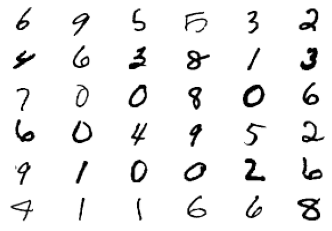

In [4]:
m = train[0].shape[0]
for i in range(36):
    ax = plt.subplot(6, 6, i+1)
    ax.axis('off')
    x_draw = train[0][randint(0, m)]
    x_draw = np.reshape(x_draw, (-1, 28))
    
    plt.imshow(x_draw, cmap='Greys')

#### Training MLP

In [5]:
%%time
[training_losses, training_errors, validation_losses, validation_errors] = net.get_training_stats(mnist.load_mnist(), epochs, mini_batch_size) 

Epoch 1, accuracy 86.75 %.
Epoch 2, accuracy 89.79 %.
Epoch 3, accuracy 90.49000000000001 %.
Epoch 4, accuracy 91.03 %.
Epoch 5, accuracy 91.72 %.
CPU times: user 1min 50s, sys: 1.46 s, total: 1min 51s
Wall time: 19.3 s


#### Training loss

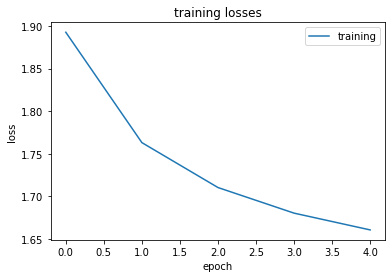

In [6]:
plt.plot(training_losses)
plt.title('training losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='best')
plt.show()


#### Validation accuracy curve

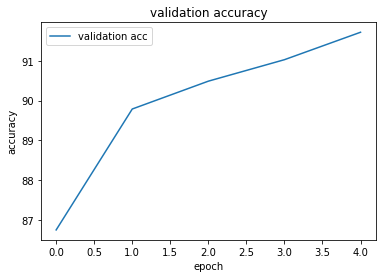

In [7]:
plt.plot(net.validation_acc)
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation acc'], loc='best')
plt.show()

In [8]:
#save the model
net.save()

#### Loading last trained model

In [11]:
path = os.path.join(os.curdir, 'models/*')

files = sorted(
    glob.iglob(path), key=os.path.getctime, reverse=True) 

#load latest model
print(files[0])
net.load(files[0])


./models/1605173164.0145211_nn_model.pkl


AttributeError: 'MLP' object has no attribute 'firstinit'

#### Let's check accuracy according to the test samples

In [ ]:
#testing neural network
test_acc = net.validate(test) * 100.0
print("Test Accuracy: " + str(test_acc) + "%")
